In [7]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

def padding(img,size):
    imgPadded=np.zeros((img.shape[0]+(2*size),img.shape[1]+(2*size)),dtype=np.uint8)
    imgPadded[size:img.shape[0]+size,size:img.shape[1]+size]=img
    return imgPadded

def blur(img,kernel_size):
  if(kernel_size%2==0):
    print("kernel size must be odd")
    return
  kernel=np.ones((kernel_size,kernel_size))
  kernel=kernel/np.sum(kernel)
  filt_image=np.zeros_like(img)
  imgPadded=padding(img,kernel_size//2)
  for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            filt_image[i,j]=np.sum(imgPadded[i:i+kernel_size,j:j+kernel_size]*kernel)
  return filt_image


In [8]:
def sobel(imgGray):
    imgGray=blur(imgGray,3)
    row,col=imgGray.shape
    imgPadded=np.zeros((row+2,col+2),dtype=np.uint8)
    imgPadded[1:row+1,1:col+1]=imgGray
    sx=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    sy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

    imgNew=np.zeros((row,col),dtype=np.uint8)
    for i in range(0,row):
        for j in range(0,col):
            tx=np.sum(imgPadded[i:i+3,j:j+3]*sx)
            ty=np.sum(imgPadded[i:i+3,j:j+3]*sy)
            imgNew[i,j]=min(round(math.sqrt((tx**2)+(ty**2))),255)
    return imgNew

In [9]:
def maxperangle(arr,ang,i,j):
  if ang[i,j]==0:
    mod=max(arr[i,j],arr[i+1,j])
    mod=max(mod,arr[i-1,j])
  elif ang[i,j]==45:
    mod=max(arr[i,j],arr[i+1,j+1])
    mod=max(mod,arr[i-1,j-1])
  elif ang[i,j]==90:
    mod=max(arr[i,j],arr[i,j+1])
    mod=max(mod,arr[i,j-1])
  elif ang[i,j]==135:
    mod=max(arr[i,j],arr[i+1,j-1])
    mod=max(mod,arr[i-1,j+1])
  return mod

def canny(img):
  img_blur=blur(img,3)
  
  imgPadded=padding(img_blur,1)

  sx=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
  sy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

  img_grad=np.zeros(img_blur.shape,dtype=np.uint8)
  img_angle=np.zeros(img_blur.shape,dtype=np.float32)

  for i in range(0,img_blur.shape[0]):
      for j in range(0,img_blur.shape[1]):
          tx=np.sum(imgPadded[i:i+3,j:j+3]*sx)
          ty=np.sum(imgPadded[i:i+3,j:j+3]*sy)
          img_grad[i,j]=min(round(math.sqrt((tx**2)+(ty**2))),255)
          img_angle[i,j]=math.atan2(ty,tx)
          if img_angle[i,j]<0:
            img_angle[i,j]+=180
          if img_angle[i,j]>=157.5:
            img_angle[i,j]=0

  start=0
  img_angle1=np.zeros_like(img_angle)
  for inc in range(4):
    img_angle1+=(((img_angle>=(start-22.5))&(img_angle<(start+22.5)))*start)
    start+=45

  imgPadded=padding(img_grad,1)
  angPadded=padding(img_angle1,1)
  img_final=np.zeros_like(imgPadded)

  for i in range(1,imgPadded.shape[0]-1):
    for j in range(1,imgPadded.shape[1]-1):
      if imgPadded[i,j]==maxperangle(imgPadded,angPadded,i,j):
        img_final[i,j]=imgPadded[i,j]
  imgPadded=img_final+0
  u_th=120
  l_th=60
  img_final=(imgPadded[1:img.shape[0],1:img.shape[1]]>=l_th)*255
  return img_final


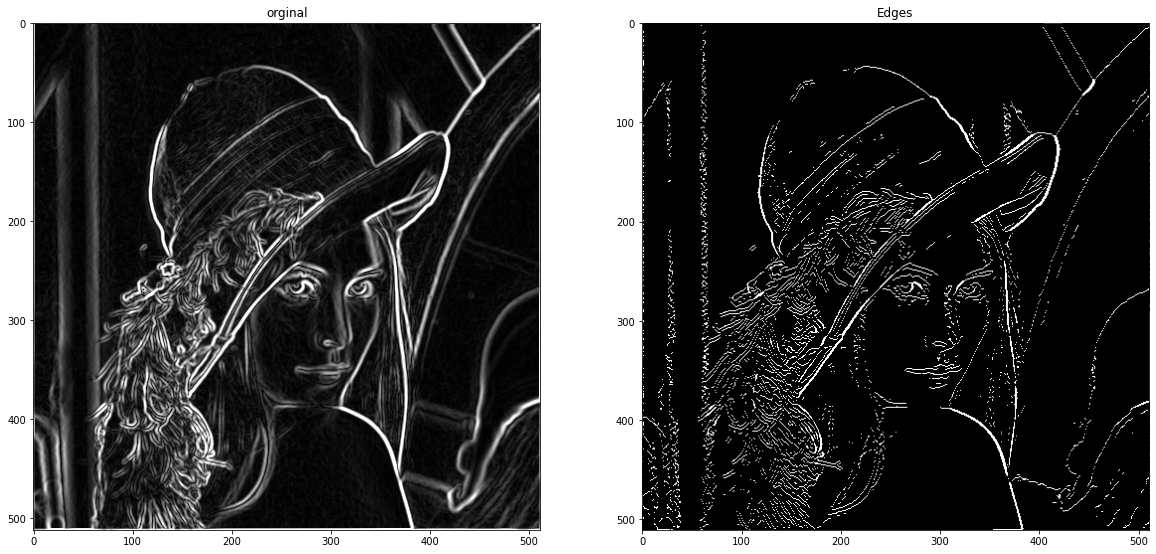

In [10]:
imgGray=cv2.imread("images/Lenna.png",0)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(sobel(imgGray),cmap='gray')
plt.title("orginal")
plt.subplot(1,2,2)
plt.imshow(canny(imgGray),cmap='gray')
plt.title("Edges")
plt.show()
    